# Homework 5
*Fill in your name and the names of any students who helped you.*

> I affirm that I personally wrote the text, code, and comments in this homework assignment. 

> I did not recieve help on this assignment.

- *By Zoeb Jamal*
- Feb 17th, 2021

## Problem 1: Faceted Histogram

Run the following code block to define a function which generates two 1-dimensional `numpy` arrays. The first array, called `groups`, consists of integers between `0` and `n_groups - 1`, inclusive. The second array, called `data`, consists of real numbers. 

In [1]:
import numpy as np
from matplotlib import pyplot as plt

def create_data(n, n_groups):
    """
    generate a set of fake data with group labels. 
    n data points and group labels are generated. 
    n_groups controls the number of distinct groups. 
    Returns an np.array() of integer group labels and an 
    np.array() of float data. 
    """
    
    # random group assignments as integers between 0 and n_groups-1, inclusive
    groups = np.random.randint(0, n_groups, n)
    
    # function of the groups plus gaussian noise (bell curve)
    data   = np.sin(groups) + np.random.randn(n)
    
    return(groups, data)

## Part A

Write a function called `facet_hist()`. This function should accept five arguments: 

1. `groups`, the `np.array` of group labels as output by `create_data()`. 
2. `data`, the `np.array` of data as output by `create_data()`.
3. `m_rows`, the number of desired rows in your faceted histogram (explanation coming). 
4. `m_cols`, the number of desired columns in your faceted histogram (explanation coming). 
5. `figsize`, the size of the figure. 

Your function will create faceted histograms -- that is, a separate axis and histogram for each group. For example, if there are six groups in the data, then you should be able to use the code 

```python
groups, data = create_data(1000, 6)
facet_hist(groups, data, m_rows = 2, m_cols = 3, figsize = (6,4))
```

to create a plot like this: 

<figure class="image" style="width:70%">
  <img src="https://philchodrow.github.io/PIC16A/homework/faceted_histogram.png
" alt="An array of six histograms, depicting bell-curve data, with two rows and three columns. Each histogram is labeled with one of the six group labels." width="400px">
</figure>

It's fine if your group labels run left-to-right (so that the top row has labels 0, 1, and 2 rather than 0, 2, 4). 


You should also be able to change the orientation by modifying `m_rows`, `m_cols`, and `figsize`. 

```
facet_hist(groups, data, m_rows = 3, m_cols = 2, figsize = (4,6))
```

<figure class="image" style="width:70%">
  <img src="https://philchodrow.github.io/PIC16A/homework/faceted_histogram_2.png
" alt="An array of six histograms, depicting bell-curve data, with three rows and two columns. Each histogram is labeled with one of the six group labels." width="300px">
</figure>

### Requirements: 

1. Your function should work **whenever `m_rows*m_cols` is equal to the total number of groups.** Your function should first check that this is the case, and raise an informative `ValueError` if not. You may assume that there is at least one data point for each group label in the data supplied. 
2. For full credit, you should not loop over the individual entries of `groups` or `data`. It is acceptable to loop over the distinct values of `groups`. In general, aim to minimize `for`-loops and maximize use of `Numpy` indexing. 
2. Use of `pandas` is acceptable but unnecessary, and is unlikely to make your solution significantly simpler. 
2. You should include a horizontal axis label (of your choice) along **only the bottom row** of axes. 
3. You should include a vertical axis label (e.g. "Frequency") along **only the leftmost column of axes.**
4. Each axis should have an axis title of the form "Group X", as shown above. 
5. Comments and docstrings! 

### Hints

- If your plots look "squished," then `plt.tight_layout()` is sometimes helpful. Just call it after constructing your figure, with no arguments. 
- Integer division `i // j` and remainders `i % j` are helpful here, although other solutions are also possible. 

### How will I solve this problem
- I will first make sure `m_rows` and `m_cols` are valid for the groups array given, raising a `ValueError` if they are not
- I will then make the figure and use `plt.tight_layout()`
- After this I will use a `for`-loop to iterate through the unique values in groups
- I will use boolean indexing to create a new array that includes only the data for the unique value in groups of the current iteration
- I will plot the histogram with index `[row, col]`. This will be determined with floor division and the remainder
- I will then set the title and labels for each axis and ensure they comply with the requirements.

In [2]:
# your solution here
def facet_hist(groups, data, m_rows, m_cols, figsize, **kwargs):
    """
    Function to create a faceted histogram for the data supplied
    
    Parameters
    ----------
    groups: the np.array of group labels
    data: the np.array of data 
    m_rows: the number of desired rows in your faceted histogram 
    m_cols: the number of desired columns in your faceted histogram
    figsize: the size of the figure.
    """
    if (m_rows * m_cols) != len(np.unique(groups)): # making sure m_rows * m_cols == number of groups
        raise ValueError("the product of the number of rows and columns you have selected is not equal to the "
                         "number of groups you have -- try again with different values for m_rows and m_cols")
    fig, axarr = plt.subplots(m_rows, m_cols, figsize = figsize, sharey = True) # making figure
    plt.tight_layout()
    for k in range(len(np.unique(groups))): # looping through the unique values in groups
        group_data = data[groups == k] # making group_data array -- an array of the data in the specific group we want
        row = k // m_cols # setting row equal to floor division of k and m_cols
        col = k % m_cols # setting col equal to remainder of k and m_cols
        ax = axarr[row, col] # making the axis for the specific group
        ax.hist(group_data, **kwargs) # plotting the data for the specified group
        ax.set(title = "Group " + str(k)) # setting title
        
        if row == m_rows - 1: # making sure xlabel only happens on last row: need -1 because row is calculated with floor division
            ax.set(xlabel = "x")
        if col == 0: # setting ylabel on the 0th column
            ax.set(ylabel = "frequency")

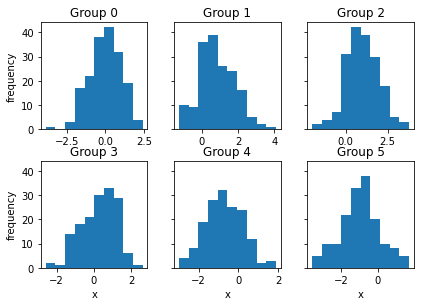

In [3]:
# test code
groups, data = create_data(1000, 6)
facet_hist(groups, data, 2, 3, figsize = (6, 4))

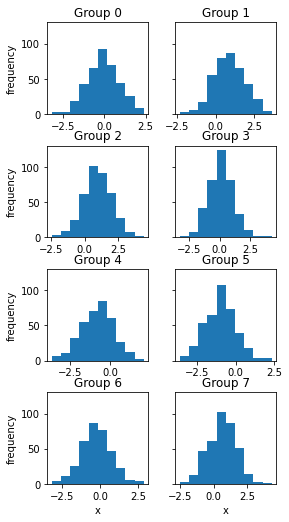

In [4]:
# test code
groups, data = create_data(3000, 8)
facet_hist(groups, data, 4, 2, figsize = (4, 7))

## Part B

Modify your function (it's ok to modify it in place, no need for copy/paste) so that it accepts additional `**kwargs` passed to `ax.hist()`. For example,  

```
facet_hist(groups, data, 2, 3, figsize = (6, 4), alpha = .4, color = "firebrick")
```

should produce 

<figure class="image" style="width:70%">
  <img src="https://philchodrow.github.io/PIC16A/homework/faceted_histogram_3.png
" alt="An array of six histograms, depicting bell-curve data, with three rows and two columns. Each histogram is labeled with one of the six group labels. The histograms are now colored pink and are slightly transparent.|" width="400px">
  <figcaption><i>Example output.</i></figcaption>
</figure>

You should be able to run this code **without defining parameters `alpha` and `color` for `facet_hist()`.** 

### How will I solve this problem
- I will simply add `**kwargs` as a parameter in my `facet_hist()` function, and also include `**kwargs` when I plot the histogram. 
```python
ax.hist(group_data)
```
is changed to 
```python
ax.hist(group_data, **kwargs)
```

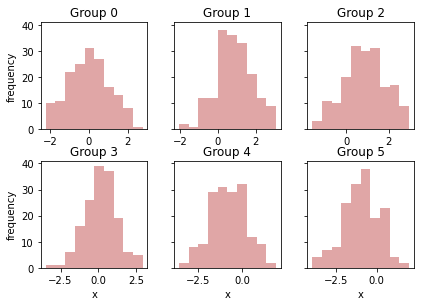

In [5]:
# run this code to show that your modified function works
groups, data = create_data(1000, 6)
facet_hist(groups, data, 2, 3, figsize = (6, 4), alpha = .4, color = "firebrick")

## Problem 2: Scatterplot Matrices

Run the following code to download, import, and display a data set from the 2019 World Happiness Report. 

In [6]:
# if you experience ConnectionRefused errors, you may instead 
# copy the url into your browser, save the file as data.csv 
# in the same directory as the notebook, and then replace the 
# third line with 
# happiness = pd.read_csv("data.csv")

import pandas as pd
url = "https://philchodrow.github.io/PIC16A/datasets/world_happiness_report/2019.csv"
happiness = pd.read_csv(url)
happiness

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


This is a `pandas` data frame. Observe the following: 

1. Each row corresponds to a country or region. 
2. The `Score` column is the overall happiness score of the country, evaluated via surveys. 
3. The other columns give indicators of different features of life in the country, including GDP, level of social support, life expectancy, freedom, generosity of compatriots, and perceptions of corruption in governmental institutions. 

 You can extract each of these columns using dictionary-like syntax: 
 
 ```python
 happiness["Score"]
 ```
 
 ```
0      7.769
1      7.600
2      7.554
3      7.494
4      7.488
       ...  
151    3.334
152    3.231
153    3.203
154    3.083
155    2.853
Name: Score, Length: 156, dtype: float64
 ```
 
Technically, this output is a `pandas` `Series`; however, in this context (and most others) it's fine to simply think of it as a 1-dimensional `np.array()`. 

### Part A

As a warmup, create a scatterplot of the overall `Score` column against a numerical column of your choice. Give the horizontal and vertical axes appropriate labels. Discuss your result. Is there a correlation? Does that correlation make sense to you? 

### How will I solve this problem
- I will make a simple scatter plot of 2 variables of interest, and then add labels

[Text(0.5, 0, 'Happiness score'), Text(0, 0.5, 'Social support')]

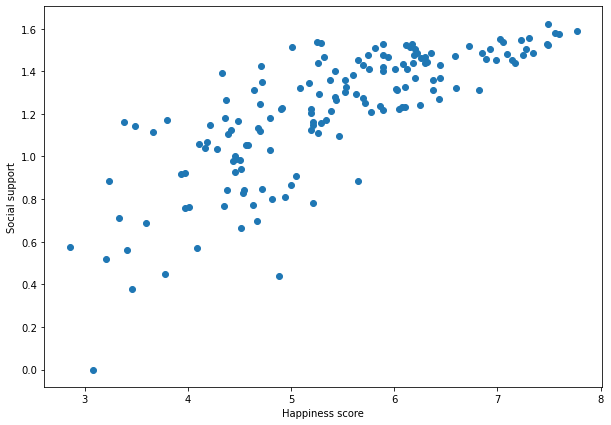

In [7]:
# plotting code here
fig, ax = plt.subplots(1, figsize = (10, 7))
ax.scatter(happiness['Score'], happiness['Social support'])
ax.set(xlabel = "Happiness score", ylabel = "Social support")

I chose to look at the relationship between the happiness score and the value for Social support. I can see a clear positive correlation -- the happiness score is higher when the social support value is also higher. This makes sense to me, as the citizens that have more social help would probably report higher overall happiness levels

## Part B

That plot you made may have helped you understand whether or not there's a relationship between the overall happiness score and the variable that you chose to plot. However, there are several variables in this data set, and we don't want to manually re-run the plot for each pair of variables. Let's see if we can get a more systematic view of the correlations in the data. 

Write a function called `scatterplot_matrix()`, with arguments `cols` and `figsize`. The `cols` argument should be a list of strings, each of which are the name of one of the columns above, for example `cols = ["Score", "GDP per capita", "Social support"]`. Your function should create a *scatterplot matrix*, like this:  

```python
cols = ["Score", 
        "GDP per capita", 
        "Social support"]
           
scatterplot_matrix(cols,figsize = (7,7))
```

<figure class="image" style="width:70%">
  <img src="https://philchodrow.github.io/PIC16A/homework/scatterplot_matrix.png" alt="A 3x3 grid of scatterplots, showing relationships between Score and GDP, Score and Social support, and GDP and Social support. The diagonal is blank. All three variables are strongly correlated with each other." width="400px">
</figure>

There is a separate scatterplot for each possible pair of variables. In fact, there are two: one where the first variable is on the horizontal axis, and one where it's on the vertical axis. Some analysts prefer to remove half the plots to avoid redundancy, but you don't have to bother with that. The diagonal is empty, since there's no point in investigating the relationship between a variable and itself. 

Don't forget comments and docstrings! 

### How will I solve this problem
- I will first get the dimensions of the matrix (will be `len(cols)` x `len(cols)`)
- I will make a figure using these dimensions
- I will use nested for loops to ensure the correct columns are plotted in the correct set of axes

In [8]:
# define your function
def scatterplot_matrix(cols, figsize):
    """
    Function that plots a matrix of scatter plots, given a list of column names to look at
    
    Parameters
    ----------
    cols: list of user-supplied column names
    figsize: the size of the figure
    """
    matrix_dims = len(cols) # determining the dimensions of the matrix: one side will be the length of the list supplied
    fig, ax = plt.subplots(matrix_dims, matrix_dims, figsize = figsize) # making the figure
    for i in range(matrix_dims):
        for j in range(matrix_dims): # nested for loops to plot the right information in the right axes
            if i != j: # making sure we only plot when the column names are different
                ax[i, j].scatter(happiness[cols[i]], happiness[cols[j]], marker = '.') # making scatterplot
                ax[i, j].set(title = cols[i], ylabel = cols[j]) # setting title, ylabel
                rho = np.corrcoef(happiness[cols[i]], happiness[cols[j]]) # getting correlation matrix
                my_number = rho[0, 1] # getting the correct value from the correlation matrix
                ax[i, j].set(xlabel = r"$\rho$ = " + str(np.round(my_number, 2))) # adding corrcoef as xlabel
    plt.tight_layout() 


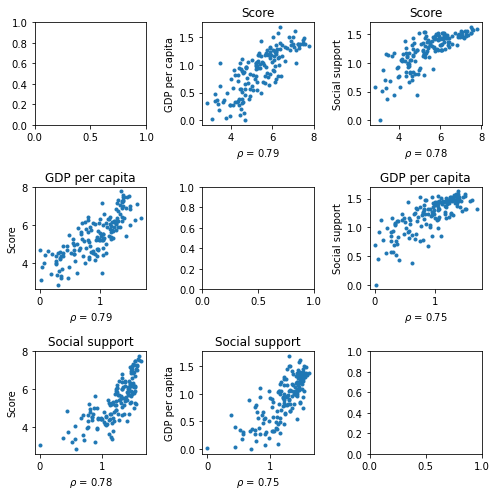

In [9]:
# test your code, several times if needed, and discuss the correlations you observe. 
# Add code cells if needed to show multiple outputs. 
cols = ["Score", "GDP per capita", "Social support"]
scatterplot_matrix(cols,figsize = (7,7))

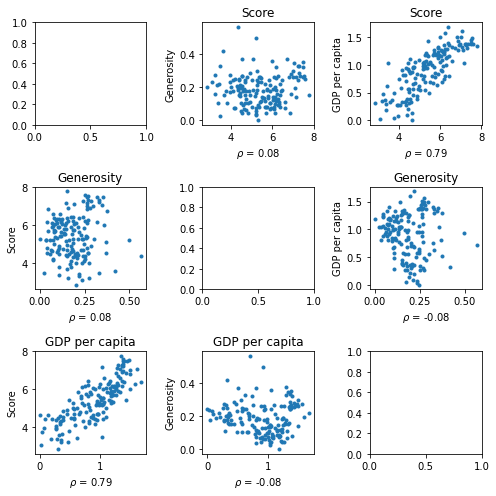

In [10]:
cols = ['Score', 'Generosity', 'GDP per capita'] 
scatterplot_matrix(cols,figsize = (7,7))

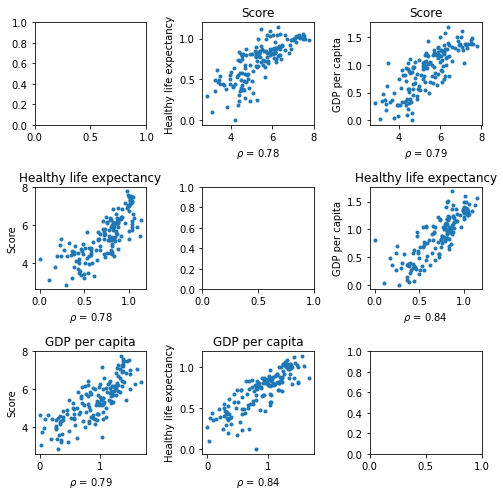

In [11]:
cols = ['Score', 'Healthy life expectancy', 'GDP per capita'] 
scatterplot_matrix(cols,figsize = (7,7))

# Discussion of part B results
I noticed that Score, Healthy life expectancy, and GDP per capita all have overwhelmingly positive correlations with each other, which makes sense -- As GPD goes up, there must be better medical services and quality of life, leading to an increased healthy life expectancy. Furthemore, a higher GDP and healthy life expectancy could make people happier, increasing their overall happiness score. 

While I noticed strong positive correlations between score and GDP, there doesn't seem to be any correlation with generosity, which I didn't expect. I would have assumed if a country was richer overall, citizens would have donated more but sadly this does not seem to be the case

## Part C

The *correlation coefficient* is a measure of linear correlation between two variables. The correlation coefficient between $X$ and $Y$ is high if $X$ tends to be high when $Y$ is, and vice versa. Correlation coefficients lie in the interval $[-1, 1]$. 

`numpy` provides a function to conveniently compute the correlation coefficient between two or more variables. Find it, and then use it to add "captions" (as horizontal axis labels) to each panel of your plot giving the correlation coefficient between the plotted variables. For example, 

```python
cols = ["Score", 
        "GDP per capita", 
        "Social support"]
           
scatterplot_matrix(cols,figsize = (7,7))
```

<figure class="image" style="width:70%">
  <img src="https://philchodrow.github.io/PIC16A/homework/scatterplot_matrix_with_cors.png" alt="A 3x3 grid of scatterplots, showing relationships between Score and GDP, Score and Social support, and GDP and Social support. The diagonal is blank. All three variables are strongly correlated with each other. Correlation coefficients between 0.70 and 0.84 lie beneath each plot." width="400px">
</figure>

It's not required that you add the Greek letter $\rho$ (the classical symbol for correlation coefficients), but if you do want to, here's how. You can also tweak the rounding as desired.  

```python
ax.set(xlabel = r"$\rho$ = " + str(np.round(my_number, 2)))
```


Run your code on several different subsets of the columns. It's ok to simply re-run your  Part B results where they are and show the output including the correlation coefficient. Discuss your findings. What positive correlations do you observe? Do they make sense? Are there any negative correlations? Do the quantitative results match what you see "by eye"? 

If you were going to create a model to attempt to predict overall happiness from other indicators, which columns would you use? Why? 

---
### Discussion of part C
It seems like the correlation coeffiecients match my conclusions that I made by looking at the scatterplots but it is nice to be able to quantify this. Based on the $\rho$ value, I can clearly determine strong positive relationships between Score and GDP per capita, GDP per capita and Healthy life expectancy, and Score and Healthy life expectancy, which I already noticed. Contrastingly, I can clearly see that the relationship between Generosity and Score is **very** weak (0.08), and there is actually a negative correlation between GDP per capita and Generosity, which was quite surprising. 

To create an ML model, I think I would use the Score, GDP per capita, and Healthy life expectancy columns, as they have the highest correlation coefficient values, and therefore would be able to give the most accurate predictions. 

---

## Problem 3: Plotting Time Series

Run the following code to download two time series data sets: 
- Historical data on the Dow Jones Industrial Average (a composite performance measure of the US stock market), retrieved from Yahoo Finance. 
- Cumulative COVID19 cases over time, from the [New York Times](https://github.com/nytimes/covid-19-data). 

In [12]:
# run this block
# if you experience ConnectionRefused errors, you may instead 
# copy the urls into your browser, save the files as DJI.csv 
# and COVID.csv respectively in the same directory as the notebook.
# Then, in the lines using the function pd.read_csv(), replace 
# the url with "DJI.csv" and "COVID.csv" 

import pandas as pd
import datetime

url = "https://query1.finance.yahoo.com/v7/finance/download/%5EDJI?period1=1580750232&period2=1612372632&interval=1d&events=history&includeAdjustedClose=true"
DJI = pd.read_csv(url)
DJI['date'] = pd.to_datetime(DJI['Date'])
DJI = DJI.drop(["Date"], axis = 1)

url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us.csv"
COVID = pd.read_csv(url)
COVID['date'] = pd.to_datetime(COVID['date'])

## Part A

The series `COVID['cases']` is essentially a `numpy` array containing the cumulative case counts over time. The COVID19 case data  is cumulative, but we would like to see the number of new cases per day (i.e. as in [this kind of plot](https://www.google.com/search?q=covid+stats)). Check the documentation for the `np.diff` function and figure out what it does. Use it appropriately to construct a new array, called `per_day`, giving the number of new cases per day. Then, make a new array called `per_day_date` that gives the appropriate date for each case count. In particular, you will need to ensure that `per_day` and `per_day_date` have the same shape. 

### How will I solve this problem
- Look up `np.diff`
- Make the per_day array; use `prepend` argument to make sure the 2 arrays are the same size

In [13]:
# your solution here
COVID['cases']
per_day = np.diff(COVID['cases'], prepend = COVID['cases'][0]) # need prepend = COVID['cases'][0] to make sure both are same length
print(per_day.shape)
per_day_date = COVID['date']
print(per_day_date.shape)

(395,)
(395,)


## Part B

Create a figure with two very wide axes, one on top of the other (i.e. two rows, one column). Use the `sharex` argument of `plt.subplots()` to ensure that these two plots will share the same horizontal axis. 

Then: 

1. On the upper axis, plot the Dow Jones Industrial Average over time. For the horizontal axis use `DJI['date']`; the for the vertical use `DJI['Close']`. 
2. On the lower axis, plot the variables `per_day_date` and `per_day` to visualize the progress of the COVID19 pandemic over time. Use a different color for the trendline. 

Give your plot horizontal and vertical axis labels. 

### How will I solve this problem
- Make figure with appropriate subplots, figsize, and set `sharex` equal to `True`
- Plot the dates vs close or cases
- Add horizontal and vertical axis labels where needed

Text(0.5, 1.0, 'Change in COVID cases per day from March 2020 to March 2021')

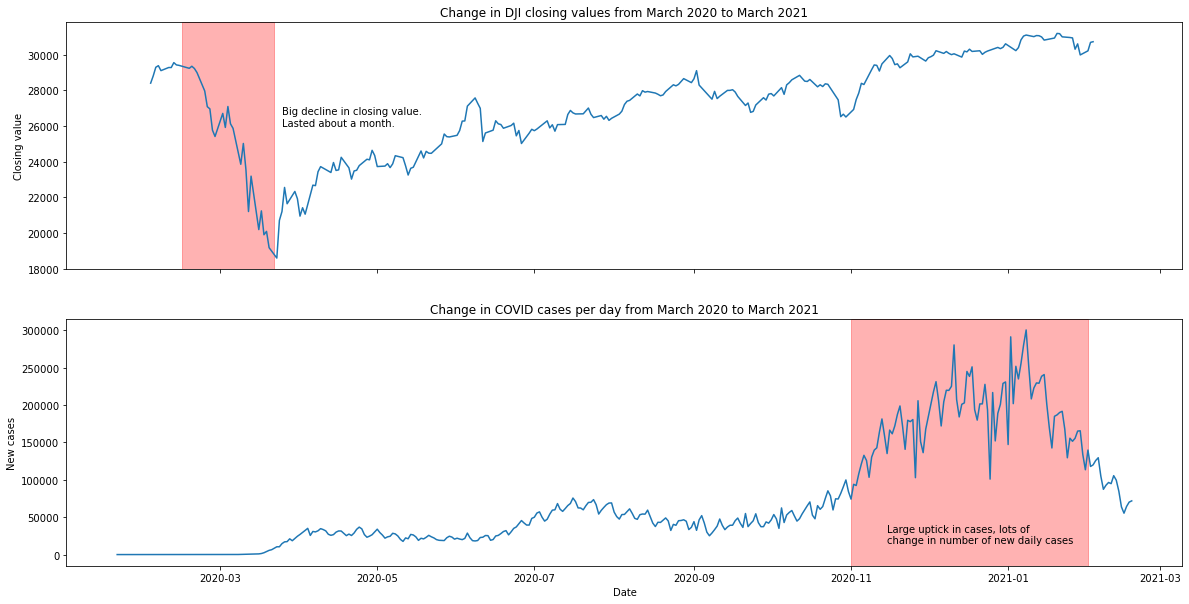

In [14]:
# your solution here
# modify this block in the remaining parts of the problem 
fig, ax = plt.subplots(2, 1, figsize = (20, 10), sharex = True)
ax[0].plot(DJI['date'], DJI['Close'])
ax[1].plot(per_day_date, per_day)
ax[1].set(xlabel = "Date", ylabel = "New cases")
ax[0].set(ylabel = "Closing value")

ax[1].axvspan(datetime.datetime(2020,11,1),
              datetime.datetime(2021,2,1), 
              alpha = .3, 
              color = "red")

ax[0].axvspan(datetime.datetime(2020,2,15),
              datetime.datetime(2020,3,22), 
              alpha = .3, 
              color = "red")

ax[0].text(datetime.datetime(2020,3,25), 
           26000, 
           "Big decline in closing value.\nLasted about a month.")

ax[1].text(datetime.datetime(2020,11,15), 
           15000, 
           "Large uptick in cases, lots of\nchange in number of new daily cases")

ax[0].set_title("Change in DJI closing values from March 2020 to March 2021")
ax[1].set_title("Change in COVID cases per day from March 2020 to March 2021")

## Part C

The command 

```
ax[0].axvspan(datetime.datetime(2020,6,1),
              datetime.datetime(2020,6,30), 
              alpha = .3, 
              color = "gray")
```

will add a simple rectangular shade which can be used to highlight specific portions of a time-series. In the given code, this shade runs through the month of June 2020. Add at least two such rectangular shades to your figure corresponding to important time intervals. You can put two shades on one axis, or one on each. If you're not sure what time periods are important, just choose intervals at random. Feel free to modify the color and transparency as desired. You can modify your figure code from Part B -- no need for copy/paste. 

## Part D

The command 

```
ax[0].text(datetime.datetime(2020,9,15), 
           22000, 
           "penguins?\npenguins!")
```

will add a fun text annotation to your plot, with the first letter in horizontal position corresponding to September 15th, and at vertical position 22,000. Annotate each of your shaded regions with a few words describing their significance. Again, just modify your Part B code. 

## Part E

Add an overall title, spruce up your axis labels, and add anything else you think will make the plot look good. Again, you can just modify your Part B code, without copy/paste. 

Then, submit a job application at www.FiveThirtyEight.com and show Nate Silver your cool data visualization.  